In [1]:
import yfinance as yf
#documentation: https://github.com/ranaroussi/yfinance


msft = yf.Ticker("MSFT")
baba = yf.Ticker("BABA")
aapl = yf.Ticker("AAPL")
fb = yf.Ticker("FB")
amzn = yf.Ticker("AMZN")
goog = yf.Ticker("GOOG")

print(msft)
"""
returns
<yfinance.Ticker object at 0x1a1715e898>
"""

yfinance.Ticker object <MSFT>


'\nreturns\n<yfinance.Ticker object at 0x1a1715e898>\n'

In [2]:
#get stock info
msft.info

{'zip': '98052',
 'sector': 'Technology',
 'fullTimeEmployees': 144000,
 'longBusinessSummary': "Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company's Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); and Skype, Outlook.com, and OneDrive. It also provides LinkedIn that includes Talent and marketing solutions, and subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. The company's Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also provides support services and Microsoft 

In [3]:
msft.history(period="yesterday")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-05,150.05,150.32,149.56,149.81,3404141,0,0


In [4]:
msft.history(period="now")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-05,150.05,150.32,149.56,149.81,3404141,0,0


In [5]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("MSFT GOOG AAPL AMZN FB BABA", period="now")

[*********************100%***********************]  6 of 6 completed


In [6]:
import datetime as dt
from datetime import timedelta
from datetime import date

end = date.today()
start = end - timedelta(days=20)


df = pdr.get_data_yahoo("MSFT GOOG AAPL AMZN FB BABA", start, end)

df_Close = df['Close']

df_Close

#to get range
#dt_Close.loc['2019-11-25':'2019-11-28']

[*********************100%***********************]  6 of 6 completed


,AAPL,AMZN,BABA,FB,GOOG,MSFT
Date,,,,,,
2019-11-14,262.640015,1754.599976,182.800003,193.149994,1311.459961,148.059998
2019-11-15,265.760010,1739.489990,185.490005,195.100006,1334.869995,149.970001
2019-11-18,267.100006,1752.530029,184.610001,197.399994,1320.699951,150.339996
2019-11-19,266.290009,1752.790039,185.250000,199.320007,1315.459961,150.389999
2019-11-20,263.190002,1745.530029,182.350006,197.509995,1303.050049,149.619995
2019-11-21,262.010010,1734.709961,184.860001,197.929993,1301.349976,149.479996
2019-11-22,261.779999,1745.719971,186.779999,198.820007,1295.339966,149.589996
2019-11-25,266.369995,1773.839966,190.449997,199.789993,1306.689941,151.229996
2019-11-26,264.290009,1796.939941,194.699997,198.970001,1313.550049,152.029999


In [8]:
import matplotlib.pyplot as plt

#%matplotlib inline
# Plot the close price of the AAPL
df_Close.plot()

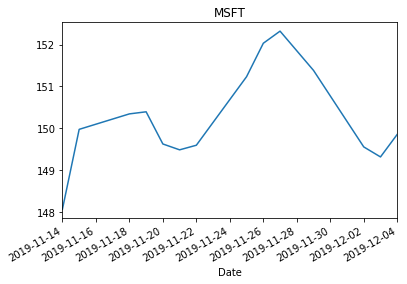

In [11]:
#saves plots to local folder
companies = []

for i in df_Close:
    companies.append(i)
    
c=0
    
for i in companies:
    plt.clf()
    df_Close[i].plot(title = i)
    savename = i+"_plot.png"
    #plt.savefig(savename)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002274DD539E8>,
      dtype=object)

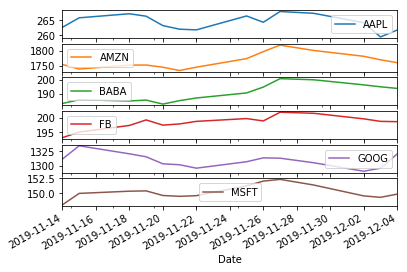

In [12]:
df_Close.plot(subplots=True)

In [37]:
#calculating the moving average

end = date.today()
start = end - timedelta(days=100)

msft_df = pdr.get_data_yahoo("MSFT", start, end)


close_px = msft_df['Adj Close']
mavg = close_px.rolling(window=10).mean()

mavg

[*********************100%***********************]  1 of 1 completed


Date
2019-08-26           NaN
2019-08-27           NaN
2019-08-28           NaN
2019-08-29           NaN
2019-08-30           NaN
                 ...    
2019-11-27    150.099947
2019-11-29    150.482158
2019-12-02    150.491016
2019-12-03    150.438998
2019-12-04    150.436000
Name: Adj Close, Length: 71, dtype: float64

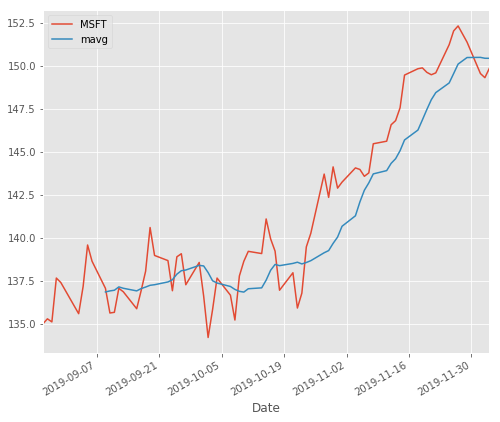

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='MSFT')
mavg.plot(label='mavg')
plt.legend()

In [58]:
#Getting biggest gainers for the day

#!/usr/bin/env python
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import json

def get_jsonparsed_data(url):
    """
    Receive the content of \`\`url\`\`, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

url = "https://financialmodelingprep.com/api/v3/stock/gainers"
gainers = get_jsonparsed_data(url)

In [59]:
#and biggest losers

#!/usr/bin/env python
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import json

def get_jsonparsed_data(url):
    """
    Receive the content of \`\`url\`\`, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

url = ("https://financialmodelingprep.com/api/v3/stock/losers")
losers = get_jsonparsed_data(url)

In [92]:
print("############BIGGEST LOSERS##############")

for loser in losers["mostLoserStock"]:
        print(loser["ticker"])
        print(loser["changes"]+ "%")
        
print("############BIGGEST GAINER##############")        
        
for gainer in gainers["mostGainerStock"]:
        print(gainer["ticker"])
        print(str(gainer["changes"]) + "%")
        

############BIGGEST LOSERS##############
NVR


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [51]:
# Import `numpy` as `np`
import numpy as np

# Assign `Adj Close` to `daily_close`
#daily_close = df[['Adj Close']]

# Daily returns
daily_pct_change = df_Close.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_change)

                AAPL      AMZN      BABA        FB      GOOG      MSFT
Date                                                                  
2019-11-14  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
2019-11-15  0.011879 -0.008612  0.014716  0.010096  0.017850  0.012900
2019-11-18  0.005042  0.007496 -0.004744  0.011789 -0.010615  0.002467
2019-11-19 -0.003033  0.000148  0.003467  0.009727 -0.003968  0.000333
2019-11-20 -0.011641 -0.004142 -0.015654 -0.009081 -0.009434 -0.005120
2019-11-21 -0.004483 -0.006199  0.013765  0.002126 -0.001305 -0.000936
2019-11-22 -0.000878  0.006347  0.010386  0.004497 -0.004618  0.000736
2019-11-25  0.017534  0.016108  0.019649  0.004879  0.008762  0.010963
2019-11-26 -0.007809  0.013023  0.022316 -0.004104  0.005250  0.005290
2019-11-27  0.013432  0.012004  0.031433  0.015228 -0.000426  0.001908
2019-11-29 -0.002203 -0.009739 -0.004083 -0.001782 -0.006116 -0.006171
2019-12-02 -0.011562 -0.010662 -0.018450 -0.009621 -0.011525 -0.012089
2019-1